In [1]:
import pandas as pd

In [17]:
d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-&d')
df = pd.read_csv('CoinDesk.csv', parse_dates=['Date'], date_parser=d_parser)

<ipython-input-17-5f6bbd09a5c4>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x, '%Y-%m-&d')


ValueError: time data '2013-10-01' does not match format '%Y-%m-&d'

In [18]:
df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [19]:
df.shape

(2642, 6)

In [20]:
df.loc[0, 'Date'].day_name()

'Tuesday'

In [13]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-&d')

In [14]:
df.head()

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [21]:
df.loc[1, 'Date'].day_name()

'Wednesday'

In [23]:
df['Date'].dt.day_name()

0         Tuesday
1       Wednesday
2        Thursday
3          Friday
4        Saturday
          ...    
2637    Wednesday
2638     Thursday
2639       Friday
2640     Saturday
2641       Sunday
Name: Date, Length: 2642, dtype: object

In [25]:
df['DayOfWeek'] = df['Date'].dt.day_name()

In [26]:
df

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),DayOfWeek
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490,Tuesday
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830,Wednesday
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330,Thursday
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160,Friday
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660,Saturday
...,...,...,...,...,...,...,...
2637,BTC,2020-12-30,28768.836208,27349.327233,28928.214391,27349.283204,Wednesday
2638,BTC,2020-12-31,29111.521567,28872.829775,29280.045328,27916.625059,Thursday
2639,BTC,2021-01-01,29333.605121,28935.810981,29601.594898,28753.412314,Friday
2640,BTC,2021-01-02,32154.167363,29353.640608,33064.673534,29012.927887,Saturday


In [27]:
df['Date'].min()

Timestamp('2013-10-01 00:00:00')

In [28]:
df['Date'].max()

Timestamp('2021-01-03 00:00:00')

In [29]:
df['Date'].max()-df['Date'].min()

Timedelta('2651 days 00:00:00')

In [35]:
filt = (df['Date'] >= '2020') & (df['Date'] < '2021')
df.loc[filt]

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),DayOfWeek
2273,BTC,2020-01-01,7174.744012,7179.957689,7237.014866,7152.992402,Wednesday
2274,BTC,2020-01-02,6955.487580,7174.712357,7190.188749,6914.857474,Thursday
2275,BTC,2020-01-03,7291.219505,6955.487580,7390.041835,6852.093401,Friday
2276,BTC,2020-01-04,7337.636670,7291.217504,7390.762935,7263.178696,Saturday
2277,BTC,2020-01-05,7347.433264,7337.421391,7487.333871,7316.763370,Sunday
...,...,...,...,...,...,...,...
2634,BTC,2020-12-27,26389.290265,26447.708072,28352.627824,25759.068609,Sunday
2635,BTC,2020-12-28,26718.029463,26226.066130,27447.551384,26046.625578,Monday
2636,BTC,2020-12-29,26975.729565,27038.735676,27169.225558,25875.049786,Tuesday
2637,BTC,2020-12-30,28768.836208,27349.327233,28928.214391,27349.283204,Wednesday


In [37]:
filt = (df['Date'] >= pd.to_datetime('2020-03-04')) & (df['Date'] < '2021')
df.loc[filt]

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),DayOfWeek
2336,BTC,2020-03-04,8756.961062,8791.112073,8852.256660,8682.684594,Wednesday
2337,BTC,2020-03-05,9078.578777,8756.962116,9172.138258,8745.992956,Thursday
2338,BTC,2020-03-06,9126.636822,9073.160134,9191.150340,9004.944712,Friday
2339,BTC,2020-03-07,8925.213488,9126.888318,9204.672359,8858.647557,Saturday
2340,BTC,2020-03-08,8166.313894,8925.217518,8925.383039,8163.682472,Sunday
...,...,...,...,...,...,...,...
2634,BTC,2020-12-27,26389.290265,26447.708072,28352.627824,25759.068609,Sunday
2635,BTC,2020-12-28,26718.029463,26226.066130,27447.551384,26046.625578,Monday
2636,BTC,2020-12-29,26975.729565,27038.735676,27169.225558,25875.049786,Tuesday
2637,BTC,2020-12-30,28768.836208,27349.327233,28928.214391,27349.283204,Wednesday


In [39]:
df.set_index('Date', inplace=True)

In [40]:
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),DayOfWeek
Date,,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349,Tuesday
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383,Wednesday
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833,Thursday
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816,Friday
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566,Saturday


In [43]:
df['2019']

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),DayOfWeek
Date,,,,,,
2019-01-01,BTC,3715.564441,3693.330067,3741.881855,3644.876282,Tuesday
2019-01-02,BTC,3882.304754,3715.564384,3900.709127,3711.274108,Wednesday
2019-01-03,BTC,3795.592741,3882.303622,3916.197684,3760.944042,Thursday
2019-01-04,BTC,3812.381108,3781.020706,3844.986111,3725.739663,Friday
2019-01-05,BTC,3809.914343,3812.381119,3866.417432,3775.828878,Saturday
...,...,...,...,...,...,...
2019-12-27,BTC,7227.293712,7183.706083,7251.381246,7065.278308,Friday
2019-12-28,BTC,7311.560644,7227.294388,7348.789794,7217.079597,Saturday
2019-12-29,BTC,7385.464848,7315.151548,7520.637034,7272.593791,Sunday


In [45]:
df['2020-01': '2020-02']

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD),DayOfWeek
Date,,,,,,
2020-01-01,BTC,7174.744012,7179.957689,7237.014866,7152.992402,Wednesday
2020-01-02,BTC,6955.487580,7174.712357,7190.188749,6914.857474,Thursday
2020-01-03,BTC,7291.219505,6955.487580,7390.041835,6852.093401,Friday
2020-01-04,BTC,7337.636670,7291.217504,7390.762935,7263.178696,Saturday
2020-01-05,BTC,7347.433264,7337.421391,7487.333871,7316.763370,Sunday
2020-01-06,BTC,7713.860754,7351.578890,7749.648613,7339.702523,Monday
2020-01-07,BTC,8039.603701,7714.908484,8192.158877,7708.885351,Tuesday
2020-01-08,BTC,8067.606369,8046.802943,8463.183418,7871.035499,Wednesday
2020-01-09,BTC,7808.701364,8046.111529,8046.283882,7755.401227,Thursday


In [47]:
df['2020-01': '2020-02']['Closing Price (USD)'].mean()

8977.049659103317

In [55]:
df['2020-01': '2020-02']['24h High (USD)'].max()

10598.0301607446

In [58]:
df['2021']['24h High (USD)'].max()

34452.0803367239

In [79]:
highs = df['Closing Price (USD)'].resample('D').max()
highs['2020-01-31']

9388.8807518859

In [80]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

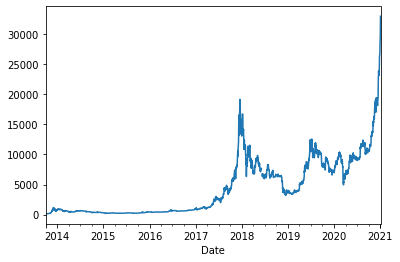

In [81]:
highs.plot()

In [82]:
df.resample('W').mean()


,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,
2013-10-06,119.727245,120.335467,123.106552,112.523995
2013-10-13,124.632664,123.814379,125.400259,122.959280
2013-10-20,143.567757,138.716971,146.314210,136.877770
2013-10-27,180.575757,178.096090,185.564616,168.961517
2013-11-03,195.837949,192.574163,196.764901,190.639257
...,...,...,...,...
2020-12-06,19140.692288,19024.083956,19546.278265,18542.289152
2020-12-13,18681.771104,18649.644537,18939.270387,18208.015312
2020-12-20,21905.471665,21283.665058,22250.125053,20976.590277


In [87]:
numbers = df.resample('W').agg({'Closing Price (USD)': 'mean', '24h High (USD)': 'max', '24h Low (USD)':'min' })

In [88]:
%matplotlib inline

<AxesSubplot:xlabel='Date'>

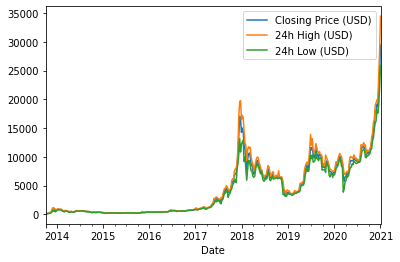

In [89]:
numbers.plot()